In [9]:
import numpy as np 
import torch
import matplotlib.pyplot as plt

In [10]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid):
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        
    def Forward(self, x):
        #print(self.activation_func)
        return self.activation_func(x @ self.w + self.b)
        

In [54]:
class RNN(torch.nn.Module):
    def __init__(self, size_in, size_out, size_mem):
        super(RNN, self).__init__()
       
        self.layer_0 = Layer(size_in + size_mem, size_mem)  # we r gonna get rid of mem layer so size out for layer 0 is size mem        
        self.layer_out = Layer(size_mem, size_out, lambda x: x)
        self.size_mem = size_mem
        
    
    def Forward(self, x):
        mem = torch.zeros(1, self.size_mem)
        out = []
        for i in range(x.shape[0]):
            z = torch.cat([x[[i], :], mem], dim =1)
            mem = self.layer_0.Forward(z)
            out.append(self.layer_out.Forward(mem))  
        out = torch.cat(out, dim = 0)
        return out
        
        
    def Generate(self, start, iterations):
        mem = torch.randn((1, self.size_mem))
        out = [start]
        for i in range(x.shape[0]):
            z = torch.cat([out[i], mem], dim =1)
            mem = self.layer_0.Forward(z)
            out.append(self.layer_out.Forward(mem))  
        out = torch.cat(out, dim = 0)
        return out
        
        
            

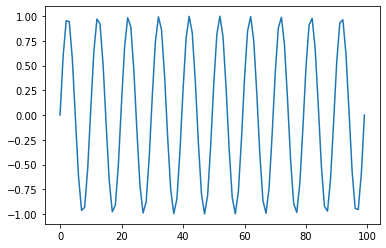

In [55]:
x = torch.linspace(-10 * np.pi, 10 *np.pi, 100)
x = x.reshape(-1, 1)
y = torch.sin(x)
y = y.reshape(-1, 1)

plt.plot(y)

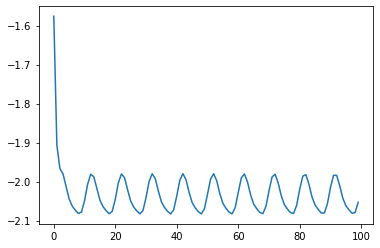

In [56]:
rnn = RNN(1, 1, 5)
y_hat = rnn.Forward(y)
plt.plot(y_hat.detach())


In [57]:
rnn = RNN(1, 1, 10)
opt = torch.optim.Adam(rnn.parameters(), lr = 1e-2)
loss_func = torch.nn.MSELoss()


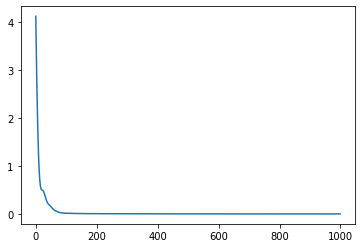

In [58]:
iterations = 1000
losses=[]
for i in range(iterations):
    y_hat = rnn.Forward(y)
    loss = loss_func(y_hat[:-1], y[1:])
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    losses.append(loss.detach())
plt.plot(losses)
    
    

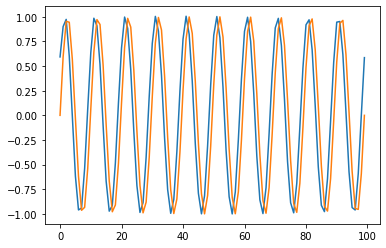

In [59]:
plt.plot(y_hat.detach())
plt.plot(y)


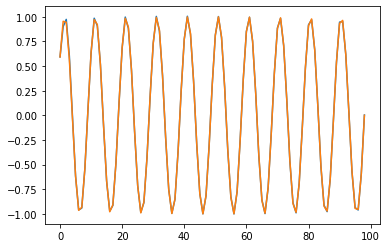

In [60]:
plt.plot(y_hat[:-1].detach())
plt.plot(y[1:])


In [62]:
y_hat = rnn.Generate(y[[0], :],100)

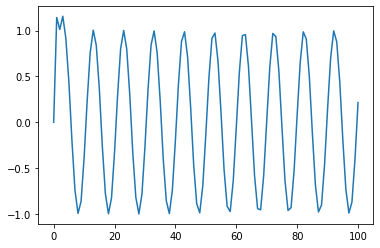

In [65]:
plt.plot(y_hat.detach())